In [35]:
import struct
import gzip
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
def read_image_file(file):
    
    data = None

    with gzip.open(file, 'rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        nrows, ncols = struct.unpack(">II", f.read(8))
        data = np.frombuffer(f.read(), dtype=np.dtype(np.uint8).newbyteorder('>'))
        data = data.reshape((size, nrows, ncols))
    
    return data

In [3]:
def read_label_file(file):
    
    labels = None
    
    with gzip.open(file, 'rb') as f:
        magic, n_items = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.dtype(np.uint8).newbyteorder('>'))
    
    return labels

In [4]:
train_file = "train-images-idx3-ubyte.gz"
test_file = "t10k-images-idx3-ubyte.gz"
train_label_file = "train-labels-idx1-ubyte.gz"
test_label_file = "t10k-labels-idx1-ubyte.gz"

In [5]:
train_data = read_image_file(train_file)
test_data = read_image_file(test_file)
print("Training Data Shape: ", train_data.shape)
print("Testing Data Shape: ", test_data.shape)

Training Data Shape:  (60000, 28, 28)
Testing Data Shape:  (10000, 28, 28)


In [6]:
train_label = read_label_file(train_label_file)
test_label = read_label_file(test_label_file)
print("Training Label Shape: ", train_label.shape)
print("Testing Label Shape: ", test_label.shape)

Training Label Shape:  (60000,)
Testing Label Shape:  (10000,)


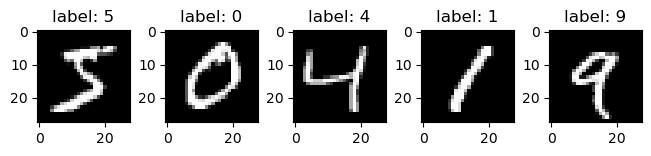

In [7]:
fig, ax = plt.subplots(1, 5, constrained_layout = True)
for i in range(5):
    ax[i].imshow(train_data[i,:,:], cmap='gray')
    ax[i].set_title('label: %d' % train_label[i])

In [8]:
train_data = train_data.reshape(train_data.shape[0], -1)
test_data = test_data.reshape(test_data.shape[0], -1)

## Fit Models. 
(The following models are using the best parameters tuned in separate model files, nb.model and lr.model.)

### Naive Bayes Model

In [26]:
NBmodel = MultinomialNB(
            alpha=1.0,
            fit_prior=True,
            class_prior=None)

In [27]:
NBmodel.fit(train_data, train_label)

MultinomialNB()

### Logistic Regression Model

In [28]:
lr_model = LogisticRegression(
        penalty="l2",  
        class_weight=None,
        random_state=0,
        solver="lbfgs",
        multi_class="multinomial",
        max_iter=800)

In [29]:
lr_model.fit(train_data, train_label)

/Users/wantienchiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=800, multi_class='multinomial', random_state=0)

### Evaluate Model Accuracy

In [30]:
NB_train_score = NBmodel.score(train_data, train_label)
NB_test_score = NBmodel.score(test_data, test_label)
print(f"Naive Bayes Training Accuracy: {NB_train_score: .2%}")
print(f"Naive Bayes Testing Accuracy: {NB_test_score: .2%}")
lr_train_score = lr_model.score(train_data, train_label)
lr_test_score = lr_model.score(test_data, test_label)
print(f"Logistic Regression Training Accuracy: {lr_train_score: .2%}")
print(f"Logistic Regression Testing Accuracy: {lr_test_score: .2%}")

Naive Bayes Training Accuracy:  82.53%
Naive Bayes Testing Accuracy:  83.65%
Logistic Regression Training Accuracy:  94.10%
Logistic Regression Testing Accuracy:  92.00%


In [31]:
NB_train_predict = NBmodel.predict(train_data)
NB_test_predict = NBmodel.predict(test_data)
lr_train_predict = lr_model.predict(train_data)
lr_test_predict = lr_model.predict(test_data)

#### Naive Bayes Model Classification Report

In [32]:
print("Naive Bayes Model Classification Report")
print(classification_report(test_label, NB_test_predict))

Naive Bayes Model Classification Report
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.91      0.93      0.92      1135
           2       0.90      0.83      0.86      1032
           3       0.80      0.84      0.82      1010
           4       0.84      0.75      0.79       982
           5       0.86      0.66      0.75       892
           6       0.89      0.90      0.89       958
           7       0.94      0.84      0.88      1028
           8       0.66      0.80      0.72       974
           9       0.71      0.86      0.78      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.83      0.84     10000
weighted avg       0.84      0.84      0.84     10000



#### Logistic Regression Model Classification Report

In [33]:
print("Logistic Regression Model Classification Report")
print(classification_report(test_label, lr_test_predict))

Logistic Regression Model Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.95      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.85      0.87       892
           6       0.94      0.94      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.86      0.89      0.87       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



### Tune Parameters

In [37]:
param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, ], 
             'fit_prior': [True, False], 
             'class_prior': [None, [0.1,] * len(np.unique(test_label)), ]}


NBsearch = GridSearchCV(NBmodel, param_grid=param_grid, cv=4, scoring='accuracy', n_jobs=-1, verbose=5)
NBsearch.fit(train_data, train_label)

print(f"Naive Bayes Model Best Accuracy: {NBsearch.best_score_: .2%}")
print(f"Naive Bayes Model Best Parameters: {NBsearch.best_params_}")

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Naive Bayes Model Best Accuracy:  82.36%
Naive Bayes Model Best Parameters: {'alpha': 0.01, 'class_prior': None, 'fit_prior': False}


In [38]:
param_grid = {'solver': ['lbfgs', 'saga'], 'max_iter': [200, 400, 600, 800, 1000]}

lr_search = GridSearchCV(lr_model, param_grid=param_grid, cv=4, scoring='accuracy', n_jobs=-1, verbose=5)
lr_search.fit(train_data, train_label)

print(f"Logistic Regression Best Accuracy: {lr_search.best_score_: .2%}")
print(f"Logistic Regression Best Parameters: {lr_search.best_params_}")

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/Users/wantienchiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wantienchiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/wantienchiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/wantienchiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/wantienchiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wantienchiang/opt/anaconda3/lib/python3.9/site-packages/sklearn

[CV 1/4] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.819 total time=  16.9s
[CV 4/4] END alpha=0.01, class_prior=None, fit_prior=False;, score=0.838 total time=  16.9s
[CV 3/4] END alpha=0.01, class_prior=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], fit_prior=True;, score=0.818 total time=  16.2s
[CV 3/4] END alpha=0.01, class_prior=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], fit_prior=False;, score=0.818 total time=  17.8s
[CV 3/4] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.818 total time=  15.6s
[CV 4/4] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.838 total time=  15.1s
[CV 2/4] END alpha=0.1, class_prior=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], fit_prior=True;, score=0.819 total time=  14.5s
[CV 2/4] END alpha=0.1, class_prior=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], fit_prior=False;, score=0.819 total time=  15.0s
[CV 3/4] END alpha=0.5, class_prior=None, fit_prior=True;, score=0.818 total time=  15.8

[CV 3/4] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.818 total time=  16.8s
[CV 1/4] END alpha=0.01, class_prior=None, fit_prior=False;, score=0.819 total time=  16.8s
[CV 1/4] END alpha=0.01, class_prior=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], fit_prior=True;, score=0.819 total time=  16.2s
[CV 1/4] END alpha=0.01, class_prior=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], fit_prior=False;, score=0.819 total time=  17.6s
[CV 1/4] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.819 total time=  15.0s
[CV 1/4] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.819 total time=  14.7s
[CV 1/4] END alpha=0.1, class_prior=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], fit_prior=True;, score=0.819 total time=  14.2s
[CV 1/4] END alpha=0.1, class_prior=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], fit_prior=False;, score=0.819 total time=  14.5s
[CV 1/4] END alpha=0.5, class_prior=None, fit_prior=True;, score=0.819 total time=  15.2

Logistic Regression Best Accuracy:  91.54%
Logistic Regression Best Parameters: {'max_iter': 200, 'solver': 'saga'}


/Users/wantienchiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Final Evaluation of Models Based on Accuracy

In [40]:
NBbest_predict_test = NBsearch.best_estimator_.predict(test_data)
NBbest_predict_train = NBsearch.best_estimator_.predict(train_data)
lr_best_predict_test = lr_search.best_estimator_.predict(test_data)
lr_best_predict_train = lr_search.best_estimator_.predict(train_data)

print(f"Naive Bayes Training Accuracy: {accuracy_score(train_label, NBbest_predict_train): .2%}")
print(f"Naive Bayes Testing Accuracy: {accuracy_score(test_label, NBbest_predict_test): .2%}")
print(f"Logistic Regression Training Accuracy: {accuracy_score(train_label, lr_best_predict_train): .2%}")
print(f"Logistic Regression Testing Accuracy: {accuracy_score(test_label, lr_best_predict_test): .2%}")

Naive Bayes Training Accuracy:  82.54%
Naive Bayes Testing Accuracy:  83.69%
Logistic Regression Training Accuracy:  93.96%
Logistic Regression Testing Accuracy:  92.55%


In [41]:
print(classification_report(test_label, NBbest_predict_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       980
           1       0.91      0.93      0.92      1135
           2       0.90      0.83      0.86      1032
           3       0.80      0.84      0.82      1010
           4       0.84      0.75      0.79       982
           5       0.86      0.66      0.75       892
           6       0.89      0.90      0.89       958
           7       0.93      0.84      0.88      1028
           8       0.66      0.80      0.72       974
           9       0.71      0.86      0.78      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.83      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [42]:
print(classification_report(test_label, lr_best_predict_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.93      0.94       982
           5       0.91      0.86      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



### Confusion Matrix

#### Naive Bayes Model Training Confusion Matrix

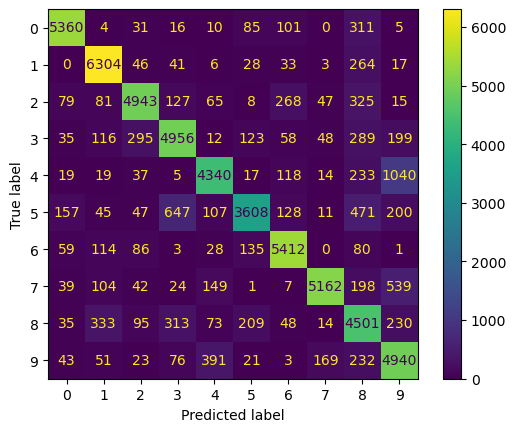

In [43]:
NBcm_train = confusion_matrix(train_label, NBbest_predict_train)
NBcm_train_display = ConfusionMatrixDisplay(NBcm_train).plot()

#### Logistic Regression Model Training Confusion Matrix

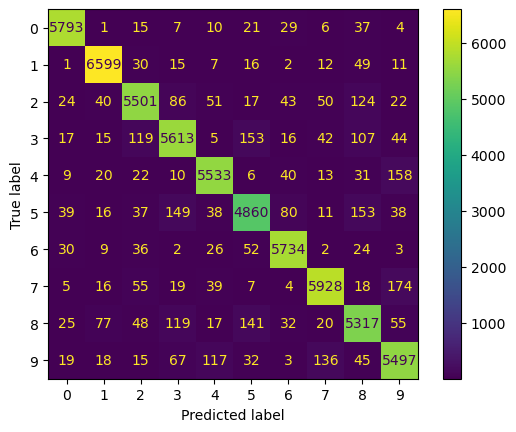

In [44]:
lrcm_train = confusion_matrix(train_label, lr_best_predict_train)
lrcm_train_display = ConfusionMatrixDisplay(lrcm_train).plot()

#### Naive Bayes Model Testinging Confusion Matrix

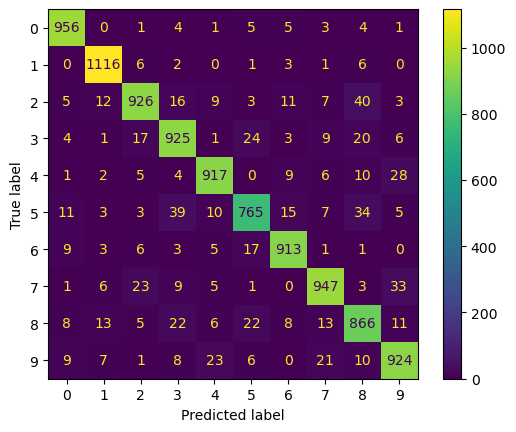

In [45]:
NBcm = confusion_matrix(test_label, lr_best_predict_test)
NBcm_display = ConfusionMatrixDisplay(NBcm).plot()

#### Logistic Regression Model Testinging Confusion Matrix

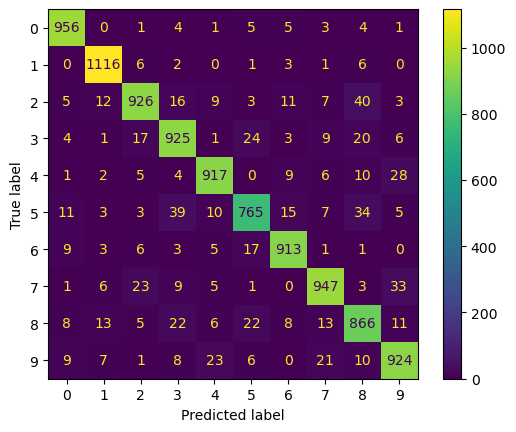

In [46]:
lrcm = confusion_matrix(test_label, lr_best_predict_test)
lrcm_display = ConfusionMatrixDisplay(lrcm).plot()

In [39]:
NBmodel.set_params(**NBsearch.best_params_)

MultinomialNB(alpha=0.01, fit_prior=False)

In [48]:
NBmodel.fit(train_data, train_label)

MultinomialNB(alpha=0.01, fit_prior=False)

In [49]:
lr_model.set_params(**lr_search.best_params_)

LogisticRegression(max_iter=200, multi_class='multinomial', random_state=0,
                   solver='saga')

In [52]:
lr_model.fit(train_data, train_label)

/Users/wantienchiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial', random_state=0,
                   solver='saga')

### Save Models

In [53]:
with open('nb.model', 'wb') as f:
    pickle.dump(NBmodel, f)
with open('lr.model', 'wb') as f:
    pickle.dump(lr_model, f)